In [1]:
import sympy as sym
sym.init_printing()
%matplotlib inline

s, z, x = sym.symbols('s, z, x')
k = sym.Symbol('k', integer=True)
Dt = sym.Symbol('\Delta t', positive=True)

# Transformada-$\mathcal{Z}$

## Definição

A transformada-$Z$ é uma transformação que representa um sinal discreto $x[k]$ no domínio espectral. Baseia-se na função exponencial complexa $z^{-k}$ com $z\in \mathbb{C}$ como núcleo.

### Transformada-$\mathcal{Z}$ Bilateral

A transformada $Z$ bilateral é definida como

\begin{equation}
X(z) = \sum_{k = -\infty}^{\infty} x[k] \, z^{-k}
\end{equation}

onde $X(z) = \mathcal{Z} \{x[k]\}$ denota a transformada-$z$ de $x[k]$. Um sinal complexo $x[k] \in \mathbb{C}$ com índice discreto $k \in \mathbb{Z}$ é representado por seu complexo de valor $X(z) \in \mathbb{C}$ com a variável dependente complexa $z \in \mathbb{C}$. A variável $z$ pode ser interpretada como a frequência complexa $z = e^{\Sigma + j \Omega}$ com $\Sigma, \Omega \in \mathbb{R}$. Se uma transformada-$z$ $X(z) = \mathcal{Z} \{x[k]\}$ existe depende da frequência complexa $z$ e do próprio sinal $x[k]$. Todos os valores $z$ para os quais a transformação $z$ converge formam uma região de convergência (ROC). As transformações de $z$ de dois sinais diferentes podem diferir apenas em relação aos seus ROCs. Conseqüentemente, o ROC precisa ser explicitamente dado para uma inversão única da transformação $z$.

Para x[k] = 1, pode-se representar a transformada z como da forma a seguir

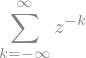

In [2]:
transform = sym.Sum(1 * z**-k, (k, -sym.oo, sym.oo))
transform

### Transformada-$\mathcal{Z}$ Unilateral

Os sinais causais desempenham um papel importante na teoria dos sinais e sistemas. Para um sinal causal com $x[k] = 0$ para $k < 0$, a relação $x[k] = x[k] \cdot \epsilon[k]$ se mantém. A introdução disso na definição dos resultados de transformação $z$ de dois lados em

\begin{equation}
X(z) = \sum_{k = -\infty}^{\infty} x[k] \cdot \epsilon[k] \, z^{-k} = \sum_{k = 0}^{\infty} x[k] \, z^{-k}
\end{equation}

Isso motiva a definição da transformação unilateral de $z$

\begin{equation}
X(z) = \sum_{k = 0}^{\infty} x[k] \, z^{-k}
\end{equation}

Na literatura, tanto a transformação $z$ unilateral quanto bilateral são denominadas como transformação $z$. Para sinais causais, ambos dão o mesmo resultado. A transformação $z$ unilateral também é útil para a solução de problemas de valor inicial, por exemplo, conforme definido por equações de diferença linear com coeficientes constantes onde os valores iniciais são, por exemplo, definido para $k \leq 0$.

Para x[k] = 1, pode-se representar a transformada z como da forma a seguir

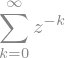

In [3]:
transform = sym.Sum(1 * z**-k, (k, 0, sym.oo))
transform

O sympy pode reconhecer essa série infinita como uma série geométrica e, sob certas condições de convergência, pode encontrar uma representação finita:

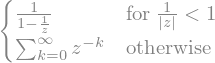

In [4]:
short_form = transform.doit()
short_form

Extraindo o primeiro caso como exemplo, temos

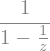

In [5]:
ex = short_form.args[0][0]
ex

### Sinais finitos

A transformação $z$ de um sinal genérico $x[k]$ de duração finita $x[k] = 0$ para $\{k: k < M_1 \wedge k \geq M_2 \}$ com $ M_1 < M_2$ leituras

\begin{equation}
X(z) = \sum_{k=M_1}^{M_2 - 1} x[k] \, z^{-k} = x[M_1] \, z^{-M_1} + x[M_1 + 1] \, z^{- (M_1 + 1)} + \dots + x[M_2 - 1] \, z^{- (M_2-1)}
\end{equation}

A transformação de um sinal de comprimento finito genérico é dada como um polinômio em $z$. Dependendo dos limites particulares $M_1$ e $M_2$, o polinômio pode conter potências de $z$ e $z^{-1}$. Para um sinal causal de comprimento finito, o resultado acima se especializa no caso $M_1 = 0$ e $M_2 > 0$ como 

\begin{equation}
X(z) = x[0] + x[1] \, z^{-1} + \dots + x[M_2 - 1] \, z^{- (M_2-1)}
\end{equation}

A transformação de um sinal causal de comprimento finito é dada como um polinômio em $z^{-1} $. O ROC para este caso é dado como $z \in\mathbb{C} \setminus \{0 \}$. Considerações semelhantes geram a transformação $ z $ e o ROC de um sinal anticausal. Os ROCs para um sinal de comprimento finito genérico podem ser resumidos como

* $z \in \mathbb{C}$ para um sinal anticausal ($M_1 < 0$, $M_2 \leq 0$)
* $z \in \mathbb{C}_\infty$ if $x[k] = 0$ para $k \neq 0$ ($M_1 = 0$, $M_2 = 1$)
* $z \in \mathbb{C} \setminus \{ 0 \}$ para um sinal causal ($M_1 = 0$, $M_2 > 0$)

onde $\mathbb{C}_\infty = \mathbb{C} \cup \{\infty\}$ denota o conjunto de números complexos estendidos.

### Transformação do Sinal Retangular

O sinal retangular $x[k] = \text{rect}_N[k]$ é um sinal causal de duração finita. Usando o resultado acima, sua transformação $z$ pode ser derivada diretamente como

\begin{equation}
\mathcal{Z} \{ \text{rect}_N[k] \} = \sum_{k=0}^{N-1} z^{-k} = 1 + z^{-1} + \dots + z^{-N + 1}
\end{equation}

para $z \in \mathbb{C} \setminus \{0 \}$. A soma acima também pode ser interpretada como série geométrica finita com proporção comum $\frac{1}{z}$, resultando em uma forma alternativa de transformação-$z$ do sinal retangular

\begin{equation}
\mathcal{Z} \{ \text{rect}_N[k] \} =  \begin{cases}
\frac{1 - z^{-N}}{1 - z^{-1}} & \text{para } z \neq 1 \\
N & \text{para } z = 1
\end{cases}
\end{equation}

### Transformação do Impulso de Dirac

A transformação $\mathcal{Z} \{\delta[k] \}$ do impulso de Dirac é derivada pela introdução de $\delta[k]$ na definição da transformação bilateral de $z$ e a exploração da propriedade de filtragem do impulso de Dirac


\begin{equation}
\mathcal{Z} \{ \delta[k] \} = \sum_{k = -\infty}^{\infty} \delta[k] \, z^{-k} = 1
\end{equation}

para $z \in \mathbb{C}$. O ROC cobre todo o plano complexo.

A transformação do impulso de Dirac é igual a um. Portanto, todas as frequências complexas $z$ estão presentes com o mesmo peso. Uma vez que o impulso de Dirac é usado para caracterizar sistemas lineares invariantes no tempo (LIT) por sua a resposta ao impulso $h[k] = \mathcal{H} \{\delta[k] \}$, isso constitui uma propriedade importante na teoria de sinais e sistemas discretos.

**Examplo**

A transformação $z$ do impulso de Dirac é calculada pela avaliação direta de sua definição. O impulso Dirac é representado pelo Kronecker delta $\delta[k] = \delta_{k 0}$ no `sym`.

In [6]:
X = sym.summation(sym.KroneckerDelta(k, 0) * z**(-k), (k, -sym.oo, sym.oo))
X

### Transformação do Sinal Exponencial Complexa

A transformação $X(z) = \mathcal{Z} \{x[k] \}$ do sinal exponencial complexa causal

\begin{equation}
x[k] = \epsilon[k] \cdot z_0^k
\end{equation}

com frequência complexa $z_0 \in \mathbb{C}$ é derivado pela avaliação da definição da transformação $z$ unilateral

\begin{equation}
X(z) = \sum_{k=0}^{\infty} z_0^k \cdot z^{-k} = \sum_{k=0}^{\infty} \left( \frac{z_0}{z} \right)^k = \frac{z}{z - z_0}
\end{equation}

A última igualdade foi derivada observando que a soma constitui uma série geométrica infinita com razão comum $\frac{z_0}{z}$ que converge para $\left| \frac{z_0}{z} \right| < 1$. O ROC é, conseqüentemente, dado como

\begin{equation}
|z| > |z_0|
\end{equation}

Combinando os resultados acima, a transformação do sinal exponencial complexo causal é

\begin{equation}
\mathcal{Z} \{ \epsilon[k] \cdot z_0^k \} = \frac{z}{z - z_0} \qquad \text{para } |z| > |z_0|
\end{equation}


**Exemplo**

A transformação $z$ do sinal exponencial complexa causal $x[k] = z_0^k \cdot \epsilon[k]$ com $z_0 \in \mathbb{C}$ é calculada por avaliação direta de sua definição.

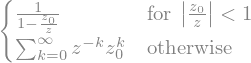

In [7]:
z0 = sym.symbols('z0')

X = sym.summation(z0**k * z**(-k), (k, 0, sym.oo))
X

Observe que a soma é devolvida caso não possa ser avaliada. Portanto, pode-se concluir que a série converge apenas para $|\frac{z_0}{z} | < 1$. Isso está de acordo com o resultado analítico derivado acima.

## Convergencia

A definição da transformação $z$ constitui uma série infinita. Uma condição suficiente, mas não necessária, para a convergência de uma série infinita é que seus elementos sejam absolutamente somados. Aplicando isso à definição da transformada-$z$ $X(z) = \mathcal{Z} \{[k] \}$ de um dado sinal $x[k]$

\begin{equation}
\sum_{k = -\infty}^{\infty} | x[k] \cdot z^{- k} | = \sum_{k = -\infty}^{\infty} | x[k] | \cdot | z |^{- k}  < \infty
\end{equation}

Pode-se concluir desse resultado que o ROC é determinado unicamente pela magnitude $|z|$ da freqüência complexa. Segue-se ainda que o ROC é dado como um anel no plano $z$ que pode incluir $z = 0$ e / ou $z = \infty$. A fase $\Omega$ da frequência complexa $z$ não tem efeito em termos de convergência, pois $z = e^{\Sigma} \cdot e^{j \Omega} $.

Para um sinal do lado direito de comprimento infinito com $x[k] = 0$ para $k < M$, o ROC é dado na forma de $|z| > a$ com $a \in \mathbb{R}^+$. Isso pode ser concluído a partir da decadência do termo $|z|^{-k}$ para $k \to \infty$, o que garante convergência para um dado $a$. No entanto, isso vale apenas para sinais $x[k]$ com crescimento exponencial.

O mesmo raciocínio leva aos ROCs de um sinal do lado esquerdo e do lado esquerdo. Os ROCs resultantes são ilustrados a seguir

![Roc Bilateral](ROC_Bilateral.png)

As áreas cinzas denotam os valores $z$ para os quais a transformação $z$ converge. As bordas $a$ dessas áreas (linhas tracejadas) dependem do sinal $x[k]$. No caso da transformação $z$ $X(z)$ ser dado em termos de uma função racional em $z$, o ROC deve ser escolhido de forma que não inclua zeros do polinômio denominador.

## Relação com a transformada de Laplace de um sinal amostrado

A ligação entre a transformada de Laplace de um sinal amostrado $x_\text{s} (t)$ e a transformada-$z$ de sua contraparte discreta $x[k] = x(k T)$ é estabelecida a seguir. Partindo do pressuposto de amostragem ideal, o sinal amostrado é lido

\begin{equation}
x_\text{s}(t) = \sum_{k = -\infty}^{\infty} x(k T) \cdot \delta(t - k T) = \sum_{k = -\infty}^{\infty} x[k] \cdot \delta(t - k T)
\end{equation}

onde $x(t)$ denota o sinal contínuo e $T$ o intervalo de amostragem. A introdução do sinal amostrado na definição da transformada de Laplace produz a transformação do sinal amostrado

\begin{equation}
X_\text{s}(s) = \int_{-\infty}^{\infty} \sum_{k = -\infty}^{\infty} x[k] \cdot \delta(t - k T) \, e^{- s t} \; dt = \sum_{k = -\infty}^{\infty} x[k] \, e^{-s k T}
\end{equation}

onde a última igualdade foi derivada alterando a ordem de soma/integração e explorando a propriedade de filtragem do impulso de Dirac.

\begin{equation}
X_\text{s}(s) = X(z) \big\rvert_{z = e^{s T}}
\end{equation}

O espectro do sinal amostrado $X_\text{s} (s)$ é igual à transformada-$z$ do Sinal discreto $X(z)$ para $z = e^{sT}$. O mapeamento resultante do plano $s$ para o plano $z$ é ilustrado pelo sombreamento e as cores na figura a seguir

![Mapeamento da relação da transformada de Laplace e a transformada Z](Laplace_e_Transformada-Z.png)

A transformada de Laplace de um sinal amostrado é peridóica em relação à frequência $\omega$. É suficiente considerar a faixa $-\frac{\pi}{T} < \Im \{s \} < \frac{\pi}{T}$ do plano $s$ para o mapeamento. O semiplano esquerdo do plano $s$ é mapeado no círculo unitário do plano $z$. O meio-plano direito correspondente é mapeado para fora do círculo unitário. O eixo imaginário do plano $s$ é mapeado no círculo unitário $|z| = 1$. A frequência $s = 0$ é mapeada em $z = 1$ e as frequências $s = \pm j \frac{\pi}{T}$ são mapeadas em $z = -1$.

## Representação 

A transformação-$z$ $X(z) = \mathcal{Z} \{x[k]\}$ depende da frequência complexa $z \in \mathbb{C}$ e é em geral complexo avaliado $X(z) \in \mathbb{C}$. Ele pode ser ilustrado traçando sua magnitude $|X(z)|$ e fase $\varphi(z)$ ou $\Re \{X(z)\}$ real e $\Im \{X(z) imaginário \}$ parte no complexo plano-$z$. 

No entanto, muitas transformações $z$ de interesse na teoria de sinais e sistemas são funções racionais em $z$. Os polinômios do numerador e denominador podem ser representados por suas raízes complexas e um fator constante. As raízes do numerador são denominadas *zeros*, enquanto as raízes do denominador são denominadas *pólos* de $X(z)$. O polinômio e a representação de zero/pólo de uma transformação $z$ racional são equivalentes

\begin{equation}
X(z) = \frac{\sum_{m=0}^{M} \beta_m \, z^{-m}}{\sum_{n=0}^{N} \alpha_n \, z^{-n}} = K \cdot \frac{\prod_{\mu=0}^{Q} (z - z_{0 \mu})}{\prod_{\nu=0}^{P} (z - z_{\infty \nu})}
\end{equation}

onde $M$ e $N$ denotam a ordem do polinômio numerador/denominador, $z_{0 \mu}$ e $z_{\infty \nu}$ $\mu$-ésimo zero/$\nu$-ésimo o polo de $X(z)$, e $Q = M-1$ e $P = N-1$ o número total de zeros e polos, respectivamente. Para $M = N$, o fator $K = \frac{\beta_M}{\alpha_N}$. Se

* $M > N$ pelo menos um pólo está localizado em $|z| = \infty$,
* $M < N$ pelo menos um pólo está localizado em $z = 0$.

É comum ilustrar os pólos e zeros em um gráfico pólo-zero. Aqui, as localizações dos pólos e zeros complexos, seus graus e o fator $K$ são plotados no plano $z$. É comum incluir o círculo unitário $|z| = 1$ no gráfico devido à sua relevância na teoria de sinais e sistemas discretos.

**Exemplo** 

A transformação $z$ do sinal exponencial complexa causal 

\begin{equation}
X(z) = \frac{z}{z - z_0} \qquad \text{para } |z| > |z_0|
\end{equation}

derivado acima é ilustrado traçando sua magnitude $|X(z)|$ sobre o plano $z$ para $z_0 = 1 + j$

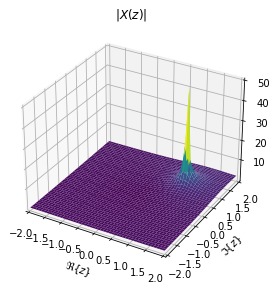

In [8]:
rez, imz = sym.symbols('rez imz', real=True)

X = z / (z - z0)
X1 = X.subs({z: rez+sym.I*imz, z0: 1+sym.I})

sym.plotting.plot3d(abs(X1), (rez, -2, 2), (imz, -2, 2),
                    xlabel=r'$\Re\{z\}$', ylabel=r'$\Im\{z\}$', title=r'$|X(z)|$');

Alternativamente, a transformação $z$ $X(z)$ pode ser ilustrada por seu gráfico pólo-zero.

In [9]:
#Pólos

poles = sym.roots(sym.denom(X), z)
poles

In [10]:
#Zeros

zeros = sym.roots(sym.numer(X), z)
zeros

Os dicionários acima são compostos de pólos e zeros, e seus graus. 

A fim de ilustrar a localização dos pólos e zeros no plano $z$, o gráfico pólo-zero é mostrado para $z_0 = 1 + j$

In [11]:
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from matplotlib.patches import Circle


def pole_zero_plot(p, z):
    
    fig = plt.figure(figsize=(5,5))
    ax = fig.gca()
    
    for pole in p:
        plt.plot(complex(pole).real, complex(pole).imag, 'rx', markersize=10)
    for zero in z:
        plt.plot(complex(zero).real, complex(zero).imag, 'bo', markersize=10, fillstyle='none')

    unit_circle = Circle((0,0), radius=1, fill=False,
                         color='black', ls='solid', alpha=0.7)
    ax.add_patch(unit_circle)
    ax.axvline(0, color='0.7')
    ax.axhline(0, color='0.7')
    
    plt.axis('equal')
    plt.xlim((-2, 2))
    plt.ylim((-2, 2))
    plt.grid()
    plt.title('Polos e Zeros')
    plt.xlabel(r'Re{$z$}')
    plt.ylabel(r'Im{$z$}')

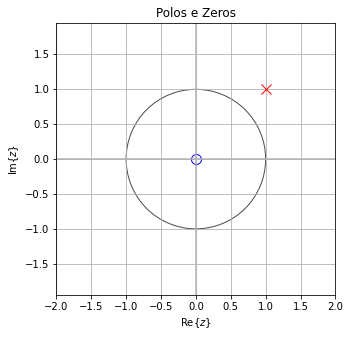

In [12]:
X2 = X.subs(z0, 1+sym.I)
pole_zero_plot(sym.roots(sym.denom(X2), z), sym.roots(sym.numer(X2), z))

# Teoremas

Os teoremas da transformação $z$ relacionam as operações básicas aplicadas a sinais discretos a seus equivalentes no domínio espectral. Eles são úteis para o cálculo de transformações-$z$ de sinais compostos de sinais padrão modificados e para o cálculo da resposta dos sistemas a um sinal de entrada. Os teoremas permitem ainda prever as consequências da modificação de um sinal ou sistema por certas operações.

### Teorema da Convolução

O teorema da convolução afirma que a transformada-$z$ da convolução linear de dois sinais discretos $x[k]$ e $y[k]$ é igual à multiplicação escalar de suas transformadas-$z$ $X(z)$ e $Y(z)$

\begin{equation}
\mathcal{Z} \{ x[k] * y[k] \} = X(z) \cdot Y(z)
\end{equation}

assumindo que ambas as transformações $X(z) = \mathcal{Z} \{x[k] \}$ e $Y(z) = \mathcal{Z} \{y[k] \}$ existem, respectivamente. O ROC da convolução linear $x(t) * y(t)$ que inclui pelo menos a interseção dos ROCs de $x[k]$ e $y[k]$

\begin{equation}
\text{ROC} \{ x[k] * y[k] \} \supseteq \text{ROC} \{ x[k] \} \cap \text{ROC} \{ y[k] \}
\end{equation}

O teorema pode ser provado introduzindo a definição da convolução linear na definição da transformada-$z$ e alterando a ordem da soma

\begin{align}
\mathcal{Z} \{ x[k] * y[k] \} &= \sum_{k = -\infty}^{\infty} \left( \sum_{\kappa = -\infty}^{\infty} x[\kappa] \cdot y[k - \kappa] \right) z^{-k} \\
&= \sum_{\kappa = -\infty}^{\infty} \left( \sum_{k = -\infty}^{\infty} y[k - \kappa] \, z^{-k} \right) x[\kappa] \\
&= Y(z) \cdot \sum_{\kappa = -\infty}^{\infty} x[\kappa] \, z^{-\kappa} \\
&= Y(z) \cdot X(z)
\end{align}

O teorema da convolução é muito útil no contexto de sistemas lineares invariantes no tempo (LTI). O sinal de saída $y[k]$ de um sistema LTI é dado como a convolução do sinal de entrada $x[k]$ com sua resposta ao impulso $h[k]$. Os sinais e sua relação podem ser representados alternativamente no domínio espectral usando o teorema da convolução. Isso leva às seguintes duas representações equivalentes de um sistema LTI

O cálculo da resposta do sistema transformando o problema no domínio espectral pode ser benéfico, uma vez que substitui a avaliação da convolução linear por uma multiplicação escalar. Em muitos casos, esse procedimento simplifica significativamente o cálculo da resposta do sistema. O teorema da convolução também pode ser útil para derivar uma transformação $z$. A chave está aqui para expressar o sinal como convolução de dois outros sinais para os quais as transformações $z$ são conhecidas. 

**Exemplo**

A convolução linear de dois sinais retangulares $\text{rect}_N [k] * \text{rect}_M [k]$ resulta em um sinal de tamanho finito de forma trapezoidal. A transformação-$z$ deste sinal é derivada pela aplicação do teorema da convolução junto com a transformada do sinal retangular. Isto resulta em

\begin{equation}
\mathcal{Z} \{ \text{rect}_N[k] * \text{rect}_M[k] \} 
= \sum_{k=0}^{N-1} z^{-k} \cdot \sum_{k=0}^{M-1} z^{-k}
= \begin{cases}
\frac{1 - z^{-N}}{1 - z^{-1}} \cdot \frac{1 - z^{-M}}{1 - z^{-1}} & \text{para } z \neq 1 \\
N \cdot M & \text{para } z = 1
\end{cases}
\end{equation}

O ROC do sinal retangular é $z \in \mathbb{C} \setminus\{0 \}$. O ROC da convolução de dois sinais retangulares também é $z \in \mathbb{C} \setminus\{0 \}$, já que em geral nenhum pólo e zeros se cancelam. Os pólos e zeros de $\mathcal{Z} \{\text{rect}_N [k] * \text{rect}_M [k] \} $ são calculados e ilustrados a seguir.


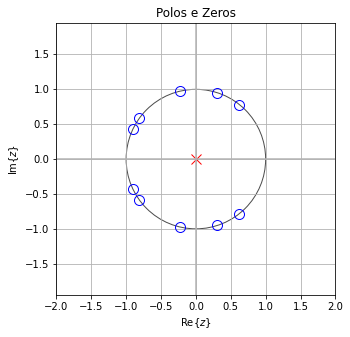

In [13]:
N = 5
M = 7

z = sym.symbols('z', complex=True)
k = sym.symbols('k', integer=True)

X = sym.summation(z**(-k), (k,0,N-1)) * sym.summation(z**(-k), (k,0,M-1))

poles = sym.roots(sym.denom(X) * z, z)
zeros = sym.roots(sym.numer(X) * z**(N+M-2), z)

pole_zero_plot(poles, zeros)

### Teorema do deslocamento

O deslocamento de um sinal $x(k - \kappa)$ para $\kappa \in \mathbb{Z}$ pode ser expresso pela convolução do sinal $x[k]$ com um impulso de Dirac deslocado

\begin{equation}
x[k - \kappa] = x[k] * \delta[k - \kappa]
\end{equation}

Isso decorre da propriedade de filtragem do impulso de Dirac. Aplicando uma transformação $z$ bilateral para o lado esquerdo e direito e explorando o teorema da convolução, que resulta

\begin{equation}
\mathcal{Z} \{ x[k - \kappa] \} = X(z) \cdot z^{- \kappa}
\end{equation}

onde $X(z) = \mathcal{Z} \{x[k] \}$ é assumido como existente. Observe que $\mathcal{Z} \{\delta[k - \kappa] \} = z^{-\kappa}$ pode ser derivado da definição da transformada-$z$ bilateral junto com a propriedade de filtragem do impulso de Dirac. A transformação $z$ de um sinal deslocado é dada multiplicando-se a transformação $z$ do sinal original por $z^{-\kappa}$. O ROC de $x[k - \kappa]$ é dado como o ROC de $x[k]$, em que os pontos $0$ e $\infty$ devem ser considerados separadamente devido ao termo $z^{-\kappa}$ em sua transformação $z$

\begin{equation}
\text{ROC} \{ x[k - \kappa] \} \supseteq \text{ROC} \{ x[k] \} \setminus \{0, \infty \}
\end{equation}

Este resultado é conhecido como teorema de deslocamento da transformação $z$. Para um sinal causal $x[k]$ e $\kappa > 0$, o teorema de deslocamento da transformação $z$ unilateral é igual ao teorema de deslocamento da transformação bilateral.

**Exemplo**

Vamos considerar um sistema que atrasa um sinal por um determinado número de amostras. Seu sinal de saída $y[k] = \mathcal{H} \{x[k] \} $ lê

\begin{equation}
y[k] = x[k-\kappa]
\end{equation}

onde $\kappa \in \mathbb{N}$. Aplicar a transformação $z$ bilateral para os lados esquerdo e direito 

\begin{equation}
Y(z) = z^{-\kappa} \cdot X(z)
\end{equation}

onde $Y(z) = \mathcal{Z} \{y[k] \}$ e $X(z) = \mathcal{Z} \{y[k] \}$. A função de transferência $H(z)$ do sistema pode ser deduzida da representação espectral da saída do sistema $Y(z) = H(z) \cdot X(z)$ como

\begin{equation}
H(z) = z^{- \kappa}
\end{equation}

Atrasar um sinal é uma operação freqüentemente aplicada no processamento de sinais discretos. Os diagramas de bloco que ilustram algoritmos de processamento de sinal freqüentemente contêm blocos que constituem atrasos. Esses blocos são comumente anotados pela função de transferência correspondente $z^{-\kappa}$.

### Teorema da modulação

A modulação complexa de um sinal $x[k]$ é definida como $z_0^{k} \cdot x[k]$ com $z_0 \in \mathbb{C} \setminus \{0 \}$. A transformação $z$ de um sinal modulado é derivada introduzindo-o na definição da transformação $z$ bilateral

\begin{equation}
\mathcal{Z} \left\{ z_0^k \cdot x[k] \right\} =
\sum_{k = -\infty}^{\infty} x[k] z_0^k \, z^{-k} =
\sum_{k = -\infty}^{\infty} x[k] \, \left( \frac{z}{z_0} \right)^{-k}
= X \left( \frac{z}{z_0} \right)
\end{equation}

onde $X(z) = \mathcal{Z} \{x[k] \} $. A modulação do sinal $x[k]$ leva a um escalonamento complexo do plano $z$ pelo fator $z_0$. A escala complexa de $z$ pode ser expressa como

\begin{equation}
\frac{z}{z_0} = \frac{|z|}{|z_0|} \; e^{j (\arg(z) - \arg(z_0))}
\end{equation}

onde $\arg(z)$ e $\arg(z_0)$ denotam o argumento (fase) de $z$ e $z_0$, respectivamente. Segue-se desta representação que a escala complexa por $z_0$ pode ser interpretada como uma escala e rotação do plano $z$.

O ROC também é em escala complexa

\begin{equation}
\text{ROC} \{ z_0^k \cdot x[k] \} = \{z: \frac{z}{z_0} \in \text{ROC} \{ x[k] \} \}
\end{equation}

Essa relação é conhecida como teorema da modulação.

**Exemplo** 

A transformação $z$ de um sinal exponencial harmônico $e^{j \Omega_0 k}$ de duração finita $N$ é derivada da seguinte forma. O sinal pode ser expresso como $e^{j \Omega_0 k} \cdot \text{rect}_N[k]$ que permite aplicar o teorema da modulação com $z_0 = e^{j \Omega_0}$. Junto com a Transformação z do sinal retangular, isso produz

\begin{equation}
\mathcal{Z} \{ e^{j \Omega_0 k} \cdot \text{rect}_N[k] \} = \begin{cases}
\frac{1 - \left( \frac{z}{e^{j \Omega_0}} \right)^{-N}}{1 - \left( \frac{z}{e^{j \Omega_0}} \right)^{-1}} & \text{para } z \neq e^{j \Omega_0} \\
N & \text{para } z = e^{j \Omega_0}
\end{cases}
\end{equation}

para $z \in \mathbb{C} \setminus \{ 0 \}$.

### Teorema da reversão

A transformação $z$ bilateral do sinal invertido $x[-k]$ de $x[k]$ é dada como

\begin{equation}
\mathcal{Z} \{ x[-k] \} = \sum_{k=-\infty}^{\infty} x[-k] \, z^{-k} = \sum_{k=-\infty}^{\infty} x[k] \, z^k =
\sum_{k=-\infty}^{\infty} x[k] \, \left( \frac{1}{z} \right)^{-k} = X \left( \frac{1}{z} \right)
\end{equation}

onde $X(z) = \mathcal{Z} \{x[k] \}$ denota a transformação-$z$ de $x[k]$. A revisão de um sinal discreto leva a uma inversão da frequência complexa $z$ em sua transformação $z$. O ROC é dado como

\begin{equation}
\text{ROC} \{ x[-k] \} = \{z: \frac{1}{z} \in \text{ROC} \{ x[k] \} \}
\end{equation}

**Exemplo** 

A transformação $z$ do sinal exponencial complexo anticausal $x[k] = -z_0 ^ k \cdot \epsilon[k - 1]$ é derivada pela aplicação de uma série de transformações ao sinal exponencial complexo $z_0[k] \cdot \epsilon[k]$. A reversão do sinal exponencial complexo produz

\begin{equation}
\mathcal{Z} \{ z_o^{-k} \cdot \epsilon[-k] \} = \frac{z^{-1}}{z^{-1} - z_0}
\end{equation}

Agora, o teorema do deslocamento é aplicado ao sinal deslocado

\begin{equation}
\mathcal{Z} \{ z_o^{-k-1} \cdot \epsilon[-k-1] \} = z \cdot \frac{z^{-1}}{z^{-1} - z_0}
\end{equation}

O fator $z_0^{-1}$ é uma constante em relação à transformação $z$. Isso produz

\begin{equation}
\mathcal{Z} \{ z_o^{-k} \cdot \epsilon[-k-1] \} = z_0 z \cdot \frac{z^{-1}}{z^{-1} - z_0}
\end{equation}

Observando que $z_o^{-k} = \left(\frac{1}{z_o} \right)^k$ obtemos

\begin{equation}
\mathcal{Z} \{ \left( \frac{1}{z_o} \right)^{k} \cdot \epsilon[-k-1] \} = z_0^{-1} z \cdot \frac{z^{-1}}{z^{-1} - z_0^{-1}} = \frac{z}{z_0 - z}
\end{equation}

A partir disso, a transformação $z$ do sinal exponencial complexo anticausal segue como

\begin{equation}
\mathcal{Z} \{ - z_0^{k} \cdot \epsilon[-k-1] \} =  \frac{z}{z - z_0}
\end{equation}

Ao considerar a influência das etapas acima no ROC, ela é derivada como

\begin{equation}
|z| < |z_0|
\end{equation}

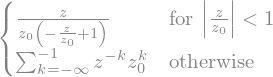

In [14]:
z0 = sym.symbols('z0', complex=True)
sym.summation(z0**k * z**(-k), (k, -sym.oo, -1))

## Propriedades 

A transformada $z$ tem uma série de propriedades específicas que podem ser inferidas diretamente a partir de sua definição. Os mais importantes no contexto de sinais e sistemas serão apresentados seguir.

### Linearidade

Como se pode concluir por sua definição, a transformada $z$ é uma operação linear. Para dois sinais $x_1[k]$ e $x_2[k]$ com a transformação-$z$ $X_1(z) = \mathcal{Z} \{x_1[k] \}$ e $X_2(z) = \mathcal{Z} \{x_2[k] \}$ o seguinte é válido

\begin{equation}
\mathcal{Z} \{ A \cdot x_1[k] + B \cdot x_2[k] \} = A \cdot X_1(z) + B \cdot X_2(z)
\end{equation}

com $A, B \in \mathbb{C}$. A região de convergência (ROC) da superposição $A x_1[k] + B x_2[k]$ é tão grande quanto a interseção dos ROCs de $x_1[k]$ e $x_2[k]$

\begin{equation}
\text{ROC} \{ A \cdot x_1[k] + B \cdot x_2[k] \} \supseteq \text{ROC} \{ x_1[k] \} \cap \text{ROC} \{ x_2[k] \}
\end{equation}

A transformada $z$ de uma superposição ponderada de sinais é igual à superposição ponderada das transformações $z$ individuais. Esta propriedade é útil para derivar a transformação de sinais que podem ser expressos como superposição de outros sinais para os quais a transformação $z$ é conhecida ou pode ser calculada mais facilmente.

#### Transformação do sinal cosseno e seno

A transformada de Laplace do cosseno $\epsilon[k] \cdot \cos (\Omega_0 k)$ e seno $\epsilon[k] \cdot \sin (\Omega_0 k)$ sinal com $\Omega_0 \in \mathbb{R}$ é derivado expressando o cosseno/seno como uma superposição de sinais exponenciais harmônicos usando a fórmula de Euler

\begin{align}
\cos(\Omega_0 k) &= \frac{1}{2} \left( e^{j \Omega_0 k} + e^{-j \Omega_0 k} \right) \\
\sin(\Omega_0 k) &= \frac{1}{2j} \left( e^{j \Omega_0 k} - e^{-j \Omega_0 k} \right)
\end{align}

A transformação $z$ do sinal exponencial harmônico pode ser derivada do espectro do sinal exponencial complexo como

\begin{equation}
\mathcal{Z} \{ \epsilon[k] \cdot e^{j \Omega_0 k} \} = \frac{z}{z - e^{j \Omega_0}} \qquad \text{para } |z| > 1
\end{equation}

Explorando a linearidade da transformação de $z$

\begin{equation}
\mathcal{Z} \{ \epsilon[k] \cdot \cos(\Omega_0 k) \} = 
\frac{1}{2} \left( \frac{z}{z - e^{j \Omega_0}} + \frac{z}{z - e^{-j \Omega_0}} \right) =
\frac{z ( z - \cos(\Omega_0))}{z^2 - 2 z \cos(\Omega_0) + 1}
\qquad \text{para } |z| > 1
\end{equation}

e

\begin{equation}
\mathcal{Z} \{ \epsilon[k] \cdot \sin(\Omega_0 k) \} = 
\frac{1}{2j} \left( \frac{z}{z - e^{j \Omega_0}} - \frac{z}{z - e^{-j \Omega_0}} \right) =
\frac{z \sin(\Omega_0)}{z^2 - 2 z \cos(\Omega_0) + 1}
\qquad \text{para } |z| > 1
\end{equation}

### Simetria para sinais de valor real

A transformação $z$ de um sinal conjugado $x^*[k]$ é dada como

\begin{equation}
\mathcal{Z} \{ x^*[k] \} = \sum_{k = -\infty}^{\infty} x^*[k] \, z^{-k} 
= \left( \sum_{k = -\infty}^{\infty} x[k] \, (z^*)^{-k} \right)^* 
= X^*(z^*)
\end{equation}

onde $X(z) = \mathcal{Z} \{x[k] \}$. O ROC de $x^*[k]$ é igual ao ROC de $x[k]$. O resultado acima é usado para derivar a transformação $z$ da parte real do sinal $x[k]$

\begin{equation}
\mathcal{Z} \left\{ \Re \{ x[k] \} \right\} = \mathcal{Z} \left\{ \frac{1}{2} ( x[k] + x^*[k] ) \right\} = \frac{1}{2} \left[ X(z) + X^*(z^*) \right]
\end{equation}

e parte imaginária

\begin{equation}
\mathcal{Z} \left\{ \Im \{ x[k] \} \right\} = \mathcal{Z} \left\{ \frac{1}{2j} ( x[k] - x^*[k] ) \right\} = \frac{1}{2j} \left[ X(z) - X^*(z^*) \right]
\end{equation}

Para um sinal de valor real $x[k] \in \mathbb {R} $ com $ \Im \{x[k] \} = 0$ segue que

\begin{equation}
X(z) = X^*(z^*)
\end{equation}

Pode-se concluir que a transformação $z$ de um sinal de valor real apresenta simetria conjugada complexa.
Os pólos e zeros de uma transformada-$z$ que pode ser expressa como uma função racional  em $z$

\begin{equation}
X(s) = \frac{\sum_{m=0}^{M} \beta_m z^{-m}}{\sum_{n=0}^{N} \alpha_n z^{-n}} = K \cdot \frac{\prod_{\mu=0}^{Q} (z - z_{0 \mu})}{\prod_{\nu=0}^{P} (z - z_{\infty \nu})}
\end{equation}

com $Q = M-1$ e $P = N-1$ mostram também simetrias específicas. Da condição acima para a transformação $z$ de um sinal de valor real $x[k] \in \mathbb{R}$, pode-se concluir que os coeficientes $\alpha_n, \beta_m$ do numerador e denominador são valores reais. O teorema da raiz conjugada complexa afirma que as raízes de um polinômio com coeficientes de valor real são pares de valores reais ou complexos conjugados. Portanto, os zeros e os pólos da transformada-$z$ $X(z)$ de um sinal de valor real $x[k]$ são pares de valores reais ou conjugados complexos.

**Exemplo**

Como exemplo para um sinal de valor real, os pólos e zeros da transformada-$z$ $X(z) = \mathcal{Z} \{\epsilon[k] \cos (\Omega_0 k) \}$ são investigados . Primeiro, a transformação, conforme derivada acima, é definida no `SymPy`


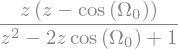

In [15]:
z = sym.symbols('z', complex=True)
W0 = sym.symbols('Omega0', real=True)

X = z * (z - sym.cos(W0)) / (z**2 - 2*z*sym.cos(W0) + 1)
X

As raízes de 𝑋 (𝑧) X (z) são calculadas

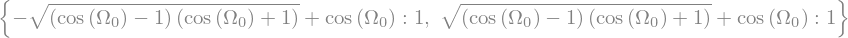

In [16]:
poles = sym.roots(sym.denom(X), z)
poles

bem como seus zeros

In [17]:
zeros = sym.roots(sym.numer(X), z)
zeros

Finalmente, o gráfico pólo-zero é desenhado para $\Omega = \frac{\pi}{4}$

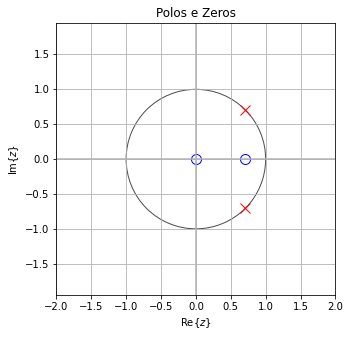

In [18]:
X2 = X.subs(W0, sym.pi/4)
pole_zero_plot(sym.roots(sym.denom(X2), z), sym.roots(sym.numer(X2), z))

## Resumo de propriedades, teoremas e transformações

As propriedades, teoremas e as transformações da transformada-$z$ bilateral, conforme derivadas nas seções anteriores, são resumidas a seguir. As tabelas correspondentes servem de referência para a aplicação da transformada $z$ na disciplina de sinais e sistemas.

### Definição

A transformada $z$ e seu inverso são definidos como

\begin{align}
X(z) &= \sum_{k = -\infty}^{\infty} x[k] \, z^{-k} \\
x[k] &= \frac{1}{2 \pi j} \oint_{C} X(z) \, z^{k - 1} \; dz
\end{align}

onde $z \in \text{ROC} \{x[k] \}$.

### Propriedades e Teoremas

As propriedades e teoremas da transformada $z$ bilateral são dados como

| &#65279; | $x[k]$ | $X(z) = \mathcal{Z} \{ x[k] \}$ | ROC |
|:---|:---:|:---:|:---|
| Linearidade | $A \, x_1[k] + B \, x_2[k]$ | $A \, X_1(z) + B \, X_2(z)$ | $\supseteq \text{ROC}\{x_1[k]\} \cap \text{ROC}\{x_2[k]\}$ |
| Conjugação | $x^*[k]$ | $X^*(z^*)$ | $\text{ROC}\{ x[k] \}$ |
| Sinal de valor Real | $x[k] = x^*[k]$ | $X(z) = X^*(z^*)$ | |
| Convolução Linear | $x[k] * h[k]$ | $X(z) \cdot H(z)$ | $\supseteq \text{ROC}\{x[k]\} \cap \text{ROC}\{h[k]\}$ |
| Deslocamento | $x[k - \kappa]$ | $z^{- \kappa} \cdot X(z)$ | $\supseteq \text{ROC}\{x[k]\} \setminus \{0, \infty \}$ |
| Modulação | $z_0^k \cdot x[k]$ | $X\left( \frac{z}{z_0} \right)$ | $\{z: \frac{z}{z_0} \in \text{ROC} \{ x[k] \} \}$ |
| Reversão | $x[-k]$ | $X \left( \frac{1}{z} \right)$ | $\{z: \frac{1}{z} \in \text{ROC} \{ x[k] \} \}$ |

onde $A, B, z_0 \in \mathbb{C}$ e $\kappa \in \mathbb{Z}$

### Transformadas selecionadas 

As transformações $z$ bilaterais que são frequentemente usadas são fornecidas como

| $x[k]$ | $X(z) = \mathcal{Z} \{ x[k] \}$ | ROC |
|:---:|:---:|:---|
| $\delta[k]$ | $1$ | $\mathbb{C}$ |
| $\epsilon[k]$ | $\frac{z}{z-1}$ | $|z| > 1$ |
| $k \epsilon[k]$ | $\frac{z}{(z-1)^2}$ | $|z| > 1$ |
| $z_0^{k} \epsilon[k]$ | $\frac{z}{z - z_0}$ | $|z| > |z_0|$ |
| $-z_0^{k} \epsilon[-k-1]$ | $\frac{z}{z - z_0}$ | $|z| < |z_0|$ |
| $\sin(\Omega_0 k) \epsilon[k]$ | $\frac{z \sin(\Omega_0)}{z^2 - 2 z \cos(\Omega_0) + 1}$ | $|z| > 1$ |
| $\cos(\Omega_0 k) \epsilon[k]$ | $\frac{z ( z - \cos(\Omega_0))}{z^2 - 2 z \cos(\Omega_0) + 1}$ | $|z| > 1$ |

onde $z_0 \in \mathbb{C}$, $\Omega_0 \in \mathbb{R}$ e $n \in \mathbb{N}$.